In [310]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

import math

from datetime import datetime, timedelta

import yfinance as yf
from sklearn.linear_model import LinearRegression

from joblib import Memory

In [209]:
# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# Get the data for these tickers from yahoo finance
yf_top500 = yf.download(tickers.Symbol.to_list(),'2021-1-1','2021-7-12', auto_adjust=True)['Close']

  Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                   Biotechnology   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989  


[*********************100%%**********************]  503 of 503 completed

6 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-1-1 -> 2021-7-12)')
['GEHC', 'VLTO', 'KVUE', 'CEG']: Exception("%ticker%: Data doesn't exist for startDate = 1609477200, endDate = 1626062400")


In [210]:
top_500_stock_list = yf_top500.columns.to_list()
len(top_500_stock_list)

503

In [202]:
# Create a list of stocks from the directory. These will be used while creating a dataframe
list_of_stocks = os.listdir("Data/Stocks")
list_of_stocks

['a.us.txt',
 'aa.us.txt',
 'aaap.us.txt',
 'aaba.us.txt',
 'aac.us.txt',
 'aal.us.txt',
 'aamc.us.txt',
 'aame.us.txt',
 'aan.us.txt',
 'aaoi.us.txt',
 'aaon.us.txt',
 'aap.us.txt',
 'aapl.us.txt',
 'aat.us.txt',
 'aau.us.txt',
 'aav.us.txt',
 'aaww.us.txt',
 'aaxn.us.txt',
 'ab.us.txt',
 'abac.us.txt',
 'abax.us.txt',
 'abb.us.txt',
 'abbv.us.txt',
 'abc.us.txt',
 'abcb.us.txt',
 'abcd.us.txt',
 'abco.us.txt',
 'abdc.us.txt',
 'abe.us.txt',
 'abeo.us.txt',
 'abeow.us.txt',
 'abev.us.txt',
 'abg.us.txt',
 'abil.us.txt',
 'abio.us.txt',
 'ablx.us.txt',
 'abm.us.txt',
 'abmd.us.txt',
 'abr.us.txt',
 'abrn.us.txt',
 'abr_a.us.txt',
 'abr_b.us.txt',
 'abr_c.us.txt',
 'abt.us.txt',
 'abtx.us.txt',
 'abus.us.txt',
 'abx.us.txt',
 'aby.us.txt',
 'ac.us.txt',
 'acad.us.txt',
 'acbi.us.txt',
 'acc.us.txt',
 'acco.us.txt',
 'accp.us.txt',
 'acer.us.txt',
 'acerw.us.txt',
 'acet.us.txt',
 'acfc.us.txt',
 'acgl.us.txt',
 'acglo.us.txt',
 'acglp.us.txt',
 'ach.us.txt',
 'achc.us.txt',
 'achn.us.tx

In [227]:
# Create Stock Dataframe. Take the first n stocks from the list and create a dataframe from them
def create_stock_dataframe(n):
    stocks = pd.DataFrame({'Ticker' : []})
    
    for i in range(0, n):
        # Try and find the data from the yfinance list. If we don't, then skip them
        try:
            # Read through the documents, reformatting the datatime so it can be used with pandas
            # This passes in the list for the top 500 stocks, which are better documented
            # It might just be easier in the future to collect the data from yfinance entirely
            data = pd.read_csv('Data/Stocks/' + top_500_stock_list[i].lower() + '.us.txt')
            data['Date'] = pd.to_datetime(data['Date'])
            data = data.set_index('Date')
            ticker =  top_500_stock_list[i].lower()
            # Drop irrelevent columns and select desired range
            # here I am selecting January and February from 2016
            data = data['2016-01':'2016-2'].drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis=1).T
            data.insert(0, 'Ticker', ticker)
            data.insert(1, 'Pattern', "")
            # Add the stock to the main dataframe, stocks
            stocks = pd.concat([stocks, data])
        except:
            pass
    return stocks

In [232]:
stock_data = create_stock_dataframe(503)
stock_data.head()

,Ticker,Pattern,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,...,2016-02-16 00:00:00,2016-02-17 00:00:00,2016-02-18 00:00:00,2016-02-19 00:00:00,2016-02-22 00:00:00,2016-02-23 00:00:00,2016-02-24 00:00:00,2016-02-25 00:00:00,2016-02-26 00:00:00,2016-02-29 00:00:00
Close,a,,39.979,39.842,40.018,38.317,37.916,37.278,37.523,36.216,...,36.433,37.210,36.540,36.786,37.365,36.521,36.826,36.971,36.933,36.698
Close,aal,,40.111,39.730,40.426,39.660,39.581,40.278,41.180,39.318,...,37.960,38.677,38.874,39.090,40.151,39.700,39.976,40.663,40.181,40.310
Close,aapl,,101.440,98.885,96.949,92.857,93.349,94.860,96.238,93.762,...,93.545,94.979,93.177,92.965,93.778,91.659,93.022,93.660,93.808,93.594
Close,abbv,,53.514,53.291,53.301,53.141,51.692,50.049,50.940,48.040,...,50.227,51.635,51.204,50.959,51.888,51.690,51.524,52.753,52.564,51.258
Close,abt,,40.918,40.908,40.566,39.593,38.764,38.822,39.517,38.634,...,36.438,36.880,36.746,36.958,37.561,36.820,37.599,38.012,37.906,37.157


In [229]:
%%capture
# Capture restricts the cell from producing output into the notebook
# For each stock, create a graph and save it
def create_charts(data):
    for i in range(0, len(data)):
        plt.figure(figsize=(40, 20))
        data.iloc[i][2:-1].interpolate().plot()
        
        plt.savefig('Images/' + stock_data['Ticker'][i] + '.png')

In [230]:
# %%capture
# create_charts(stock_data)

In [231]:
len(stock_data)

461

In [236]:
image_names = os.listdir("Images")
image_names[0].split('.')[0]

'a'

In [242]:
images = [x.split('.')[0] for x in image_names]
labeled_data = pd.DataFrame({'Ticker': images, 'Pattern': np.nan})
labeled_data.head()

,Ticker,Pattern
0,a,NaN
1,aa,NaN
2,aaap,NaN
3,aaba,NaN
4,aac,NaN


<AxesSubplot:>

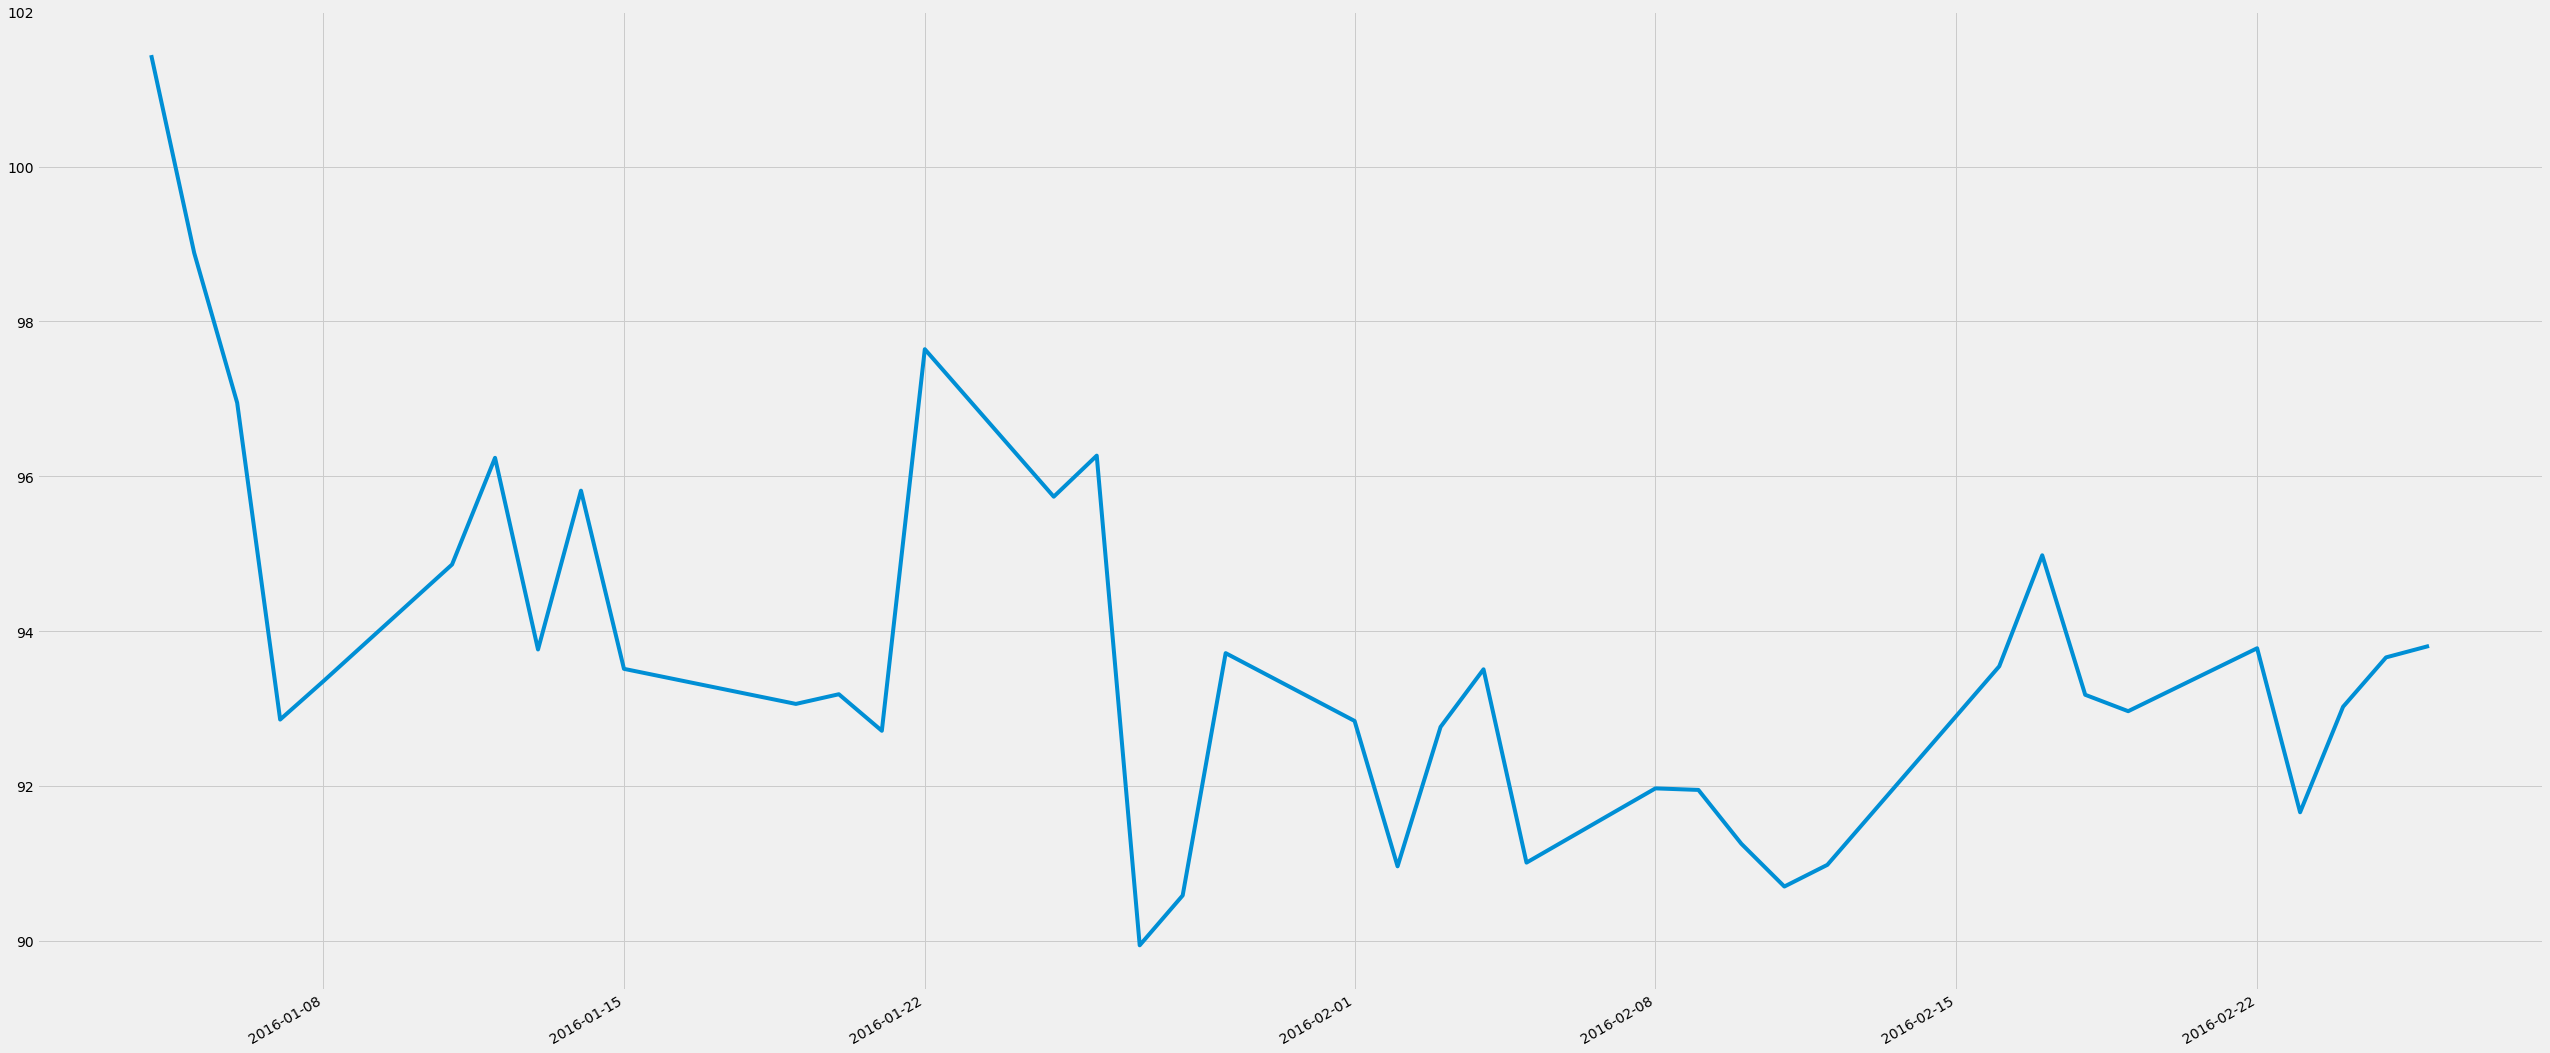

In [250]:
import quandl as qdl
from scipy.stats import linregress

# Calculate the trend line of apple
plt.figure(figsize=(40, 20))
stock_data.iloc[2][2:-1].interpolate().plot()

In [330]:
data = stock_data.iloc[2][2:-1]  # load data set
X = stock_data.iloc[0:0, 2:-1]  # values converts it into a numpy array
Y = stock_data.iloc[2][2:-1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ValueError: Found array with 0 sample(s) (shape=(0, 38)) while a minimum of 1 is required by LinearRegression.

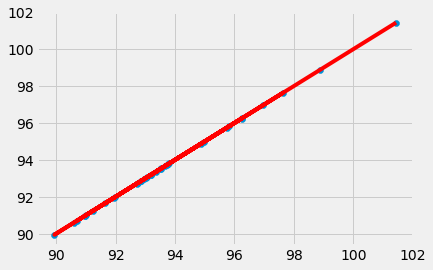

In [312]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [334]:
stock_data.iloc[2][2:-1].shape

(38,)

In [338]:
df = stock_data.iloc[2][2:-1]
df['Days'] = np.arange(df.shape[0])
type(df)

pandas.core.series.Series